<a href="https://colab.research.google.com/github/AmanSegavo/Prediksi_Siapa_yang_Introvert_dan_Siapa_yang-_kstrovert/blob/main/Prediksi_Siapa_yang_Introvert_dan_Siapa_yang_Ekstrovert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Function to get the export link for a Google Drive file
def get_gdrive_export_link(file_id):
    return f'https://drive.google.com/uc?export=download&id={file_id}'

# Extract file IDs from the original shared links
data_latih_file_id = '111Iv5WYUrq7RMpJbDMbJaqn01vO4IMN0'
data_uji_file_id = '1WJmLqKlwBiKPiGurabhjhJNoeclExas3'

# Get the export links
data_latih_url = get_gdrive_export_link(data_latih_file_id)
data_uji_url = get_gdrive_export_link(data_uji_file_id)

# Read the CSV files using the export links
data_latih = pd.read_csv(data_latih_url)
data_uji = pd.read_csv(data_uji_url)

# Display the first few rows of each DataFrame to confirm loading
display(data_latih.head())
display(data_uji.head())

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [58]:
data_latih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [59]:
data_latih.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


aku terjemahkan aja kolomnya

In [60]:
data_latih.rename(columns={
    'Time_spent_Alone': 'Waktu_Dihabiskan_Sendirian',
    'Social_event_attendance': 'Kehadiran_Acara_Sosial',
    'Going_outside': 'Frekuensi_Keluar_Rumah',
    'Friends_circle_size': 'Ukuran_Lingkaran_Pertemanan',
    'Post_frequency': 'Frekuensi_Membuat_Potingan',
    'Stage_fear': 'Rasa_Takut_Tampil',
    'Drained_after_socializing': 'Lelah_Setelah_Bersosialisasi',
    'Personality': 'Kepribadian'
}, inplace=True)


In [61]:
data_latih

,id,Waktu_Dihabiskan_Sendirian,Rasa_Takut_Tampil,Kehadiran_Acara_Sosial,Frekuensi_Keluar_Rumah,Lelah_Setelah_Bersosialisasi,Ukuran_Lingkaran_Pertemanan,Frekuensi_Membuat_Potingan,Kepribadian
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


Kepribadian
Extrovert    13699
Introvert     4825
Name: count, dtype: int64


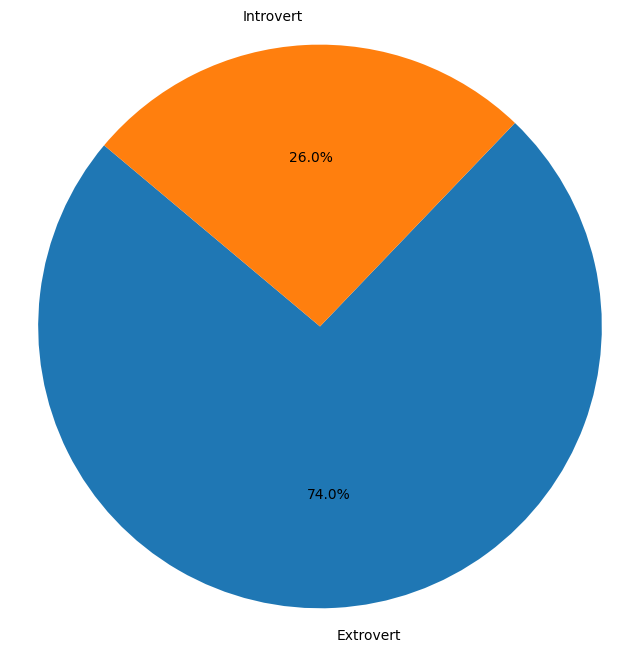

In [62]:
hitung_kepribadian = data_latih['Kepribadian'].value_counts()
print(hitung_kepribadian)

labels = hitung_kepribadian.index
sizes = hitung_kepribadian.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

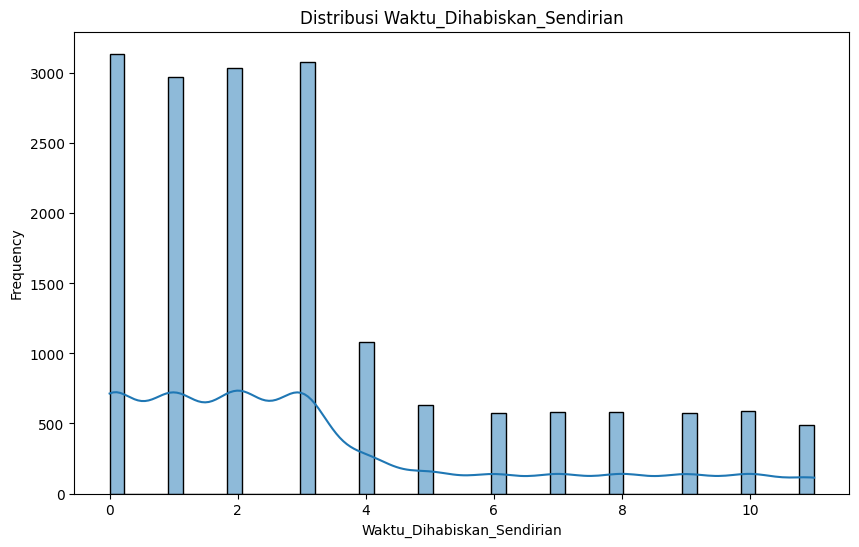

In [63]:
# prompt: i want create 3 visualizations around the 'Waktu_Dihabiskan_Sendirian' feature in the data_latih. the first visualization should be simple histogram displaying the general distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=data_latih, x='Waktu_Dihabiskan_Sendirian', kde=True)
plt.title('Distribusi Waktu_Dihabiskan_Sendirian')
plt.xlabel('Waktu_Dihabiskan_Sendirian')
plt.ylabel('Frequency')
plt.show()


In [64]:
print(data_latih.isnull().sum())

id                                 0
Waktu_Dihabiskan_Sendirian      1190
Rasa_Takut_Tampil               1893
Kehadiran_Acara_Sosial          1180
Frekuensi_Keluar_Rumah          1466
Lelah_Setelah_Bersosialisasi    1149
Ukuran_Lingkaran_Pertemanan     1054
Frekuensi_Membuat_Potingan      1264
Kepribadian                        0
dtype: int64


In [65]:
# Mengisi kolom numerik dengan median
kolom_numerik = ['Waktu_Dihabiskan_Sendirian', 'Kehadiran_Acara_Sosial', 'Frekuensi_Keluar_Rumah', 'Ukuran_Lingkaran_Pertemanan', 'Frekuensi_Membuat_Potingan']
for kolom in kolom_numerik:
    median_value = data_latih[kolom].median()
    data_latih[kolom].fillna(median_value, inplace=True)

/tmp/ipython-input-65-3178419839.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_latih[kolom].fillna(median_value, inplace=True)


In [66]:
# Mengisi kolom kategorikal dengan modus
kolom_kategorikal = ['Rasa_Takut_Tampil', 'Lelah_Setelah_Bersosialisasi']
for kolom in kolom_kategorikal:
    modus_value = data_latih[kolom].mode()[0]
    data_latih[kolom].fillna(modus_value, inplace=True)

/tmp/ipython-input-66-1054974590.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_latih[kolom].fillna(modus_value, inplace=True)


In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
# 1. Encoding Kolom Target ('Kepribadian')
# Menggunakan LabelEncoder untuk mengubah 'Introvert'/'Extrovert' menjadi 0/1
le = LabelEncoder()
data_latih['Kepribadian'] = le.fit_transform(data_latih['Kepribadian'])

In [69]:
# 2. Encoding Fitur Kategorikal
# Menggunakan One-Hot Encoding dengan pd.get_dummies()
# Ini akan membuat kolom baru untuk setiap kategori unik (misal: Rasa_Takut_Tampil_Ya)
data_latih = pd.get_dummies(data_latih, columns=['Rasa_Takut_Tampil', 'Lelah_Setelah_Bersosialisasi'], drop_first=True)

In [70]:
# Tampilkan beberapa baris pertama untuk melihat hasilnya
print(data_latih.head())

   id  Waktu_Dihabiskan_Sendirian  Kehadiran_Acara_Sosial  \
0   0                         0.0                     6.0   
1   1                         1.0                     7.0   
2   2                         6.0                     1.0   
3   3                         3.0                     7.0   
4   4                         1.0                     4.0   

   Frekuensi_Keluar_Rumah  Ukuran_Lingkaran_Pertemanan  \
0                     4.0                         15.0   
1                     3.0                         10.0   
2                     0.0                          3.0   
3                     3.0                         11.0   
4                     4.0                         13.0   

   Frekuensi_Membuat_Potingan  Kepribadian  Rasa_Takut_Tampil_Yes  \
0                         5.0            0                  False   
1                         8.0            0                  False   
2                         0.0            1                   True   
3       

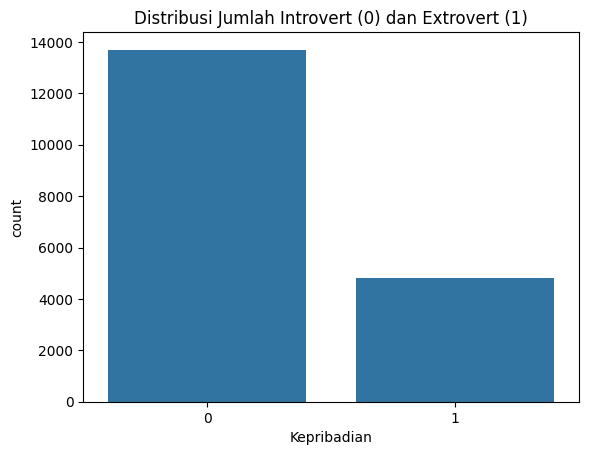

In [71]:
sns.countplot(x='Kepribadian', data=data_latih)
plt.title('Distribusi Jumlah Introvert (0) dan Extrovert (1)')
plt.show()

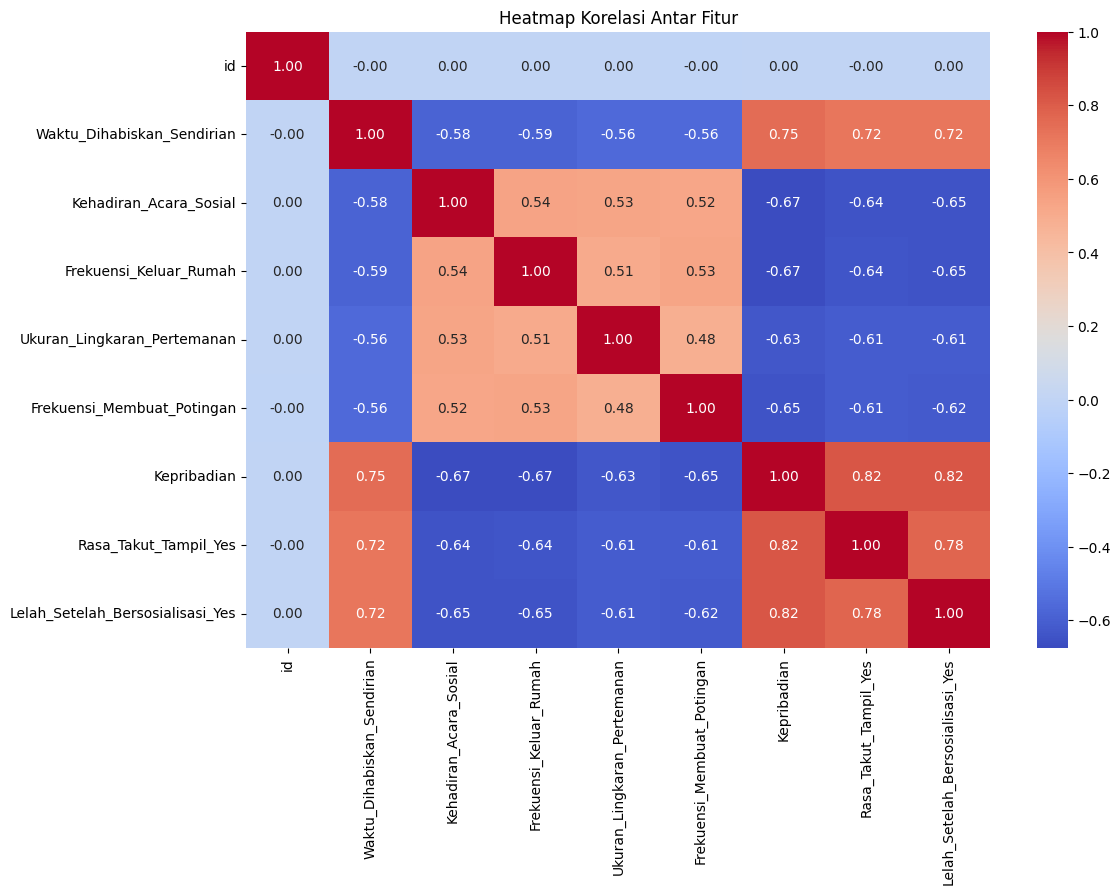

In [72]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_latih.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

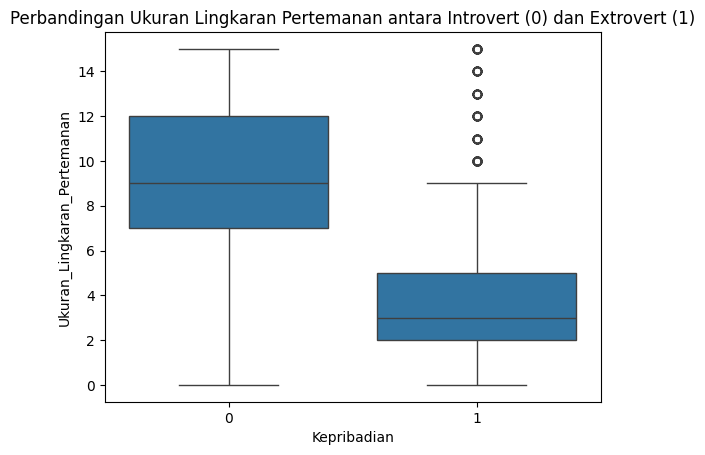

In [73]:
# Contoh: Membandingkan ukuran lingkaran pertemanan
sns.boxplot(x='Kepribadian', y='Ukuran_Lingkaran_Pertemanan', data=data_latih)
plt.title('Perbandingan Ukuran Lingkaran Pertemanan antara Introvert (0) dan Extrovert (1)')
plt.show()

In [74]:
# Pastikan kolom 'id' sudah dihapus jika masih ada
if 'id' in data_latih.columns:
    data_latih = data_latih.drop('id', axis=1)

# Pisahkan fitur (X) dan target (y)
X = data_latih.drop('Kepribadian', axis=1)
y = data_latih['Kepribadian']

print("Bentuk data fitur (X):", X.shape)
print("Bentuk data target (y):", y.shape)

Bentuk data fitur (X): (18524, 7)
Bentuk data target (y): (18524,)


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [76]:
from sklearn.ensemble import RandomForestClassifier

# 1. Inisialisasi model
# n_estimators=100 berarti model ini adalah gabungan dari 100 pohon keputusan
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Latih model menggunakan data latih
print("Melatih model...")
model.fit(X_train, y_train)
print("Model selesai dilatih!")

Melatih model...
Model selesai dilatih!


In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Buat prediksi pada data uji
y_pred = model.predict(X_test)

# 2. Lihat hasilnya
print("\n===== HASIL EVALUASI MODEL =====")

# Akurasi: Seberapa banyak prediksi yang benar secara keseluruhan?
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {akurasi * 100:.2f}%")

# Laporan Klasifikasi: Rincian performa untuk setiap kelas (Introvert/Extrovert)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Extrovert (0)', 'Introvert (1)']))

# Confusion Matrix: Menunjukkan detail prediksi yang benar dan salah
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


===== HASIL EVALUASI MODEL =====
Akurasi Model: 96.68%

Laporan Klasifikasi:
               precision    recall  f1-score   support

Extrovert (0)       0.98      0.97      0.98      2740
Introvert (1)       0.93      0.95      0.94       965

     accuracy                           0.97      3705
    macro avg       0.95      0.96      0.96      3705
 weighted avg       0.97      0.97      0.97      3705


Confusion Matrix:
[[2666   74]
 [  49  916]]


In [78]:
import joblib

# Menyimpan model ke dalam sebuah file
joblib.dump(model, 'model_kepribadian.pkl')

print("Model berhasil disimpan!")

Model berhasil disimpan!


In [79]:
# Muat kembali model yang sudah disimpan
model_terlatih = joblib.load('model_kepribadian.pkl')

# CONTOH: Membuat data baru untuk 1 orang
# Pastikan urutan dan jumlah kolomnya sama persis dengan data X saat pelatihan!
data_baru = [[
    # Isi dengan nilai-nilai fitur sesuai urutan kolom X_train
    # contoh:
    15.0, # Waktu_Dihabiskan_Sendirian
    8.0,  # Kehadiran_Acara_Sosial
    2.0,  # Frekuensi_Keluar_Rumah
    4.0,  # Ukuran_Lingkaran_Pertemanan
    1.0,  # Frekuensi_Membuat_Potingan
    1.0,  # Rasa_Takut_Tampil_Yes
    1.0   # Lelah_Setelah_Bersosialisasi_Yes
]]

# Lakukan prediksi
prediksi = model_terlatih.predict(data_baru)
hasil_prediksi_proba = model_terlatih.predict_proba(data_baru)

# Tampilkan hasil
if prediksi[0] == 1:
    print(f"Hasil Prediksi: Introvert")
else:
    print(f"Hasil Prediksi: Extrovert")

print(f"Keyakinan Model: {hasil_prediksi_proba[0][prediksi[0]]*100:.2f}%")

Hasil Prediksi: Introvert
Keyakinan Model: 69.00%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [81]:
if data_latih['Kepribadian'].dtype == 'object':
    le = LabelEncoder()
    data_latih['Kepribadian'] = le.fit_transform(data_latih['Kepribadian'])
    print(dict(zip(le.classes_, le.transform(le.classes_))))


In [82]:
# 5. Split untuk validasi internal
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred_val = model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))

Validation Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.97      0.98      0.98      2753
   Introvert       0.94      0.93      0.93       952

    accuracy                           0.96      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



In [85]:
data_uji.columns


Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [86]:
data_uji.rename(columns={
    'Time_spent_Alone': 'Waktu_Dihabiskan_Sendirian',
    'Stage_fear': 'Rasa_Takut_Tampil_Yes',
    'Social_event_attendance': 'Kehadiran_Acara_Sosial',
    'Going_outside': 'Frekuensi_Keluar_Rumah',
    'Drained_after_socializing': 'Lelah_Setelah_Bersosialisasi_Yes',
    'Friends_circle_size': 'Ukuran_Lingkaran_Pertemanan',
    'Post_frequency': 'Frekuensi_Membuat_Potingan',
    'Personality': 'Kepribadian'
}, inplace=True)


In [87]:
data_latih.columns

Index(['Waktu_Dihabiskan_Sendirian', 'Kehadiran_Acara_Sosial',
       'Frekuensi_Keluar_Rumah', 'Ukuran_Lingkaran_Pertemanan',
       'Frekuensi_Membuat_Potingan', 'Kepribadian', 'Rasa_Takut_Tampil_Yes',
       'Lelah_Setelah_Bersosialisasi_Yes'],
      dtype='object')

In [88]:
data_uji.columns

Index(['id', 'Waktu_Dihabiskan_Sendirian', 'Rasa_Takut_Tampil_Yes',
       'Kehadiran_Acara_Sosial', 'Frekuensi_Keluar_Rumah',
       'Lelah_Setelah_Bersosialisasi_Yes', 'Ukuran_Lingkaran_Pertemanan',
       'Frekuensi_Membuat_Potingan'],
      dtype='object')

In [89]:
data_uji_renamed = data_uji.rename(columns={
    'waktu_sendiri': 'Waktu_Dihabiskan_Sendirian',
    'takut_panggung': 'Rasa_Takut_Tampil_Yes',
    'hadir_acara_sosial': 'Kehadiran_Acara_Sosial',
    'keluar_rumah': 'Frekuensi_Keluar_Rumah',
    'lelah_setelah_sosial': 'Lelah_Setelah_Bersosialisasi_Yes',
    'ukuran_lingkaran_teman': 'Ukuran_Lingkaran_Pertemanan',
    'frekuensi_postingan': 'Frekuensi_Membuat_Potingan'
})

In [90]:
# 3. Siapkan fitur dan label dari data_latih
X_train = data_latih.drop(columns=['Kepribadian'])
y_train = data_latih['Kepribadian']


In [91]:
# 4. Encode label jika masih string
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [92]:

# 5. Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

In [93]:
X_test = data_uji_renamed[X_train.columns]


In [95]:
def konversi_yes_no(df):
    for kolom in ['Rasa_Takut_Tampil_Yes', 'Lelah_Setelah_Bersosialisasi_Yes']:
        if df[kolom].dtype == 'object':
            df[kolom] = df[kolom].map({'Yes': 1, 'No': 0})
    return df

In [96]:
data_latih = konversi_yes_no(data_latih)
data_uji_renamed = konversi_yes_no(data_uji_renamed)

In [97]:
X_train = data_latih.drop(columns=['Kepribadian'])
y_train = data_latih['Kepribadian']

In [98]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [99]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

In [100]:
X_test = data_uji_renamed[X_train.columns]

In [101]:
y_pred_test_encoded = model.predict(X_test)
y_pred_test = le.inverse_transform(y_pred_test_encoded)

In [103]:
hasil = pd.DataFrame({
    'id': data_uji['id'],
    'Kepribadian_Prediksi': y_pred_test
})
hasil.to_csv('/content/drive/Othercomputers/My Laptop/Documents/submission.csv', index=False)
print("Selesai. File: hasil_prediksi.csv.")

Selesai. File: hasil_prediksi.csv.


In [105]:
def konversi_yes_no(df):
    for kolom in ['Rasa_Takut_Tampil_Yes', 'Lelah_Setelah_Bersosialisasi_Yes']:
        if df[kolom].dtype == 'object':
            df[kolom] = df[kolom].map({'Yes': 1, 'No': 0})
    return df

In [106]:

data_latih = konversi_yes_no(data_latih)
data_uji_renamed = konversi_yes_no(data_uji_renamed)

In [107]:
X_train = data_latih.drop(columns=['Kepribadian'])
y_train = data_latih['Kepribadian']

In [108]:
y_train = y_train.map({'Ekstrovert': 'Ekstrovert', 'Introvert': 'Introvert'})

In [109]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [110]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

In [111]:
X_test = data_uji_renamed[X_train.columns]

In [112]:
y_pred_test_encoded = model.predict(X_test)
y_pred_test = le.inverse_transform(y_pred_test_encoded)

In [113]:
hasil = pd.DataFrame({
    'id': data_uji['id'],
    'Personality': y_pred_test  # Ubah nama kolom sesuai permintaan
})
hasil.to_csv('/content/drive/Othercomputers/My Laptop/Documents/submission.csv', index=False)
print("✅ Selesai. File hasil: hasil_prediksi.csv dengan label Ekstrovert dan Introvert.")

✅ Selesai. File hasil: hasil_prediksi.csv dengan label Ekstrovert dan Introvert.


In [114]:
print(data_latih['Kepribadian'].value_counts())
print(data_latih.dtypes)
print(data_latih.head())


Kepribadian
Extrovert    13699
Introvert     4825
Name: count, dtype: int64
Waktu_Dihabiskan_Sendirian          float64
Kehadiran_Acara_Sosial              float64
Frekuensi_Keluar_Rumah              float64
Ukuran_Lingkaran_Pertemanan         float64
Frekuensi_Membuat_Potingan          float64
Kepribadian                          object
Rasa_Takut_Tampil_Yes                  bool
Lelah_Setelah_Bersosialisasi_Yes       bool
dtype: object
   Waktu_Dihabiskan_Sendirian  Kehadiran_Acara_Sosial  Frekuensi_Keluar_Rumah  \
0                         0.0                     6.0                     4.0   
1                         1.0                     7.0                     3.0   
2                         6.0                     1.0                     0.0   
3                         3.0                     7.0                     3.0   
4                         1.0                     4.0                     4.0   

   Ukuran_Lingkaran_Pertemanan  Frekuensi_Membuat_Potingan Kepribadian 

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load data


# Rename kolom
data_uji_renamed = data_uji.rename(columns={
    'waktu_sendiri': 'Waktu_Dihabiskan_Sendirian',
    'takut_panggung': 'Rasa_Takut_Tampil_Yes',
    'hadir_acara_sosial': 'Kehadiran_Acara_Sosial',
    'keluar_rumah': 'Frekuensi_Keluar_Rumah',
    'lelah_setelah_sosial': 'Lelah_Setelah_Bersosialisasi_Yes',
    'ukuran_lingkaran_teman': 'Ukuran_Lingkaran_Pertemanan',
    'frekuensi_postingan': 'Frekuensi_Membuat_Potingan'
})

# Pastikan tipe data boolean di kedua dataframe
for kolom in ['Rasa_Takut_Tampil_Yes', 'Lelah_Setelah_Bersosialisasi_Yes']:
    if data_uji_renamed[kolom].dtype != bool:
        data_uji_renamed[kolom] = data_uji_renamed[kolom].map({'Yes': True, 'No': False})

# Fitur dan label
X_train = data_latih.drop(columns=['Kepribadian'])
y_train = data_latih['Kepribadian']

# Encode label agar model bisa jalan, tetap menggunakan Extrovert dan Introvert
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train_encoded)

# Pastikan urutan kolom konsisten
X_test = data_uji_renamed[X_train.columns]

# Prediksi
y_pred_test_encoded = model.predict(X_test)
y_pred_test = le.inverse_transform(y_pred_test_encoded)

# Simpan hasil
hasil = pd.DataFrame({
    'id': data_uji['id'],
    'Personality': y_pred_test
})
hasil.to_csv('/content/drive/Othercomputers/My Laptop/D:/submission.csv', index=False)

print("✅ Selesai. File hasil_prediksi.csv siap dengan label Extrovert dan Introvert.")


✅ Selesai. File hasil_prediksi.csv siap dengan label Extrovert dan Introvert.
